In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.inspection import permutation_importance

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\sobo\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [12]:
heart_data=pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')

In [13]:
X = heart_data.drop(columns=['HeartDiseaseorAttack'])

In [14]:
Y = heart_data['HeartDiseaseorAttack']

In [15]:
X_train,X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [16]:
len(X_train)


202944

In [17]:
len(X_test)

50736

In [18]:
len(Y_train)

202944

In [19]:
len(Y_test)

50736

In [20]:
model=RandomForestClassifier()

In [21]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [22]:
predictions=model.predict(X_test)

In [23]:
Accuracy = accuracy_score(Y_test,predictions)

In [24]:
print(Accuracy)

0.9026923683380637


In [25]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     45930
           1       0.45      0.11      0.18      4806

    accuracy                           0.90     50736
   macro avg       0.68      0.55      0.56     50736
weighted avg       0.87      0.90      0.88     50736



In [26]:
confusion_matrix(Y_test,predictions)

array([[45267,   663],
       [ 4274,   532]], dtype=int64)

In [27]:
pd.DataFrame(confusion_matrix(Y_test,predictions),columns=['Predicted No', 'Predicted Yes'], index=['Actual No', 'Actual Yes'])

,Predicted No,Predicted Yes
Actual No,45267,663
Actual Yes,4274,532


In [28]:
plot_confusion_matrix(model, X_test, Y_test,display_labels = ['No', 'Yes'])  

NameError: name 'plot_confusion_matrix' is not defined

In [ ]:
feature_names=['HighBP','HighChol','CholCheck','BMI','Smoker','Stroke','Diabetes','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex','Age','AnyHealthcare','NoDocbcCost','Education','Income']

In [ ]:
heart_data=pd.DataFrame(X, columns=feature_names)

In [ ]:
for i in feature_names:
    print(i)

In [22]:
heart_data[i]=heart_data[i] / heart_data[i].std()

In [23]:
import eli5
from eli5.sklearn import PermutationImportance

In [24]:
perm = PermutationImportance(model, random_state=1).fit(X_test,Y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0032 ± 0.0008,GenHlth
0.0020 ± 0.0004,Stroke
0.0009 ± 0.0011,Age
0.0006 ± 0.0003,Sex
0.0005 ± 0.0004,Diabetes
0.0004 ± 0.0007,DiffWalk
0.0003 ± 0.0003,Smoker
0.0003 ± 0.0003,PhysActivity
0.0003 ± 0.0005,Veggies
0.0001 ± 0.0005,Fruits


In [25]:
# Initialize a list of results
results = []

In [26]:
from sklearn.metrics import mean_squared_error
rmse_full_mod = mean_squared_error(model.predict(X_test), Y_test, squared = False)

In [27]:
# Iterate through each predictor
for predictor in X_test:
    
    # Create a copy of X_test
    X_test_copy = X_test.copy()
    
    # Scramble the values of the given predictor
    X_test_copy[predictor] = X_test[predictor].sample(frac=1).values
    
    # Calculate the new RMSE
    new_rmse = mean_squared_error(model.predict(X_test_copy), Y_test,
                                  squared = False)
    
    # Append the increase in MSE to the list of results 
    results.append({'pred': predictor,
                    'score': new_rmse - rmse_full_mod })

In [28]:
# Convert to a pandas dataframe and rank the predictors by score
resultsdf = pd.DataFrame(results).sort_values(by = 'score',
                                              ascending = False)

In [29]:
resultsdf

,pred,score
13,GenHlth,0.006094
5,Stroke,0.002921
18,Age,0.001605
0,HighBP,0.000945
6,Diabetes,0.000662
8,Fruits,0.000410
16,DiffWalk,0.000410
3,BMI,0.000315
17,Sex,0.000284
19,Education,0.000158


<AxesSubplot:xlabel='pred'>

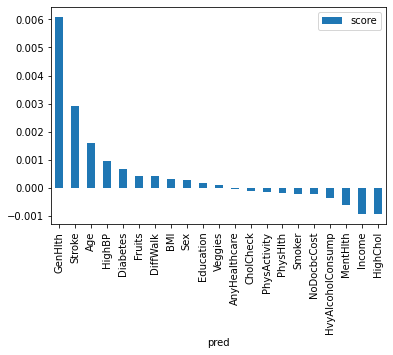

In [30]:
resultsdf.plot(x ='pred', y ='score', kind='bar')

In [31]:
importance = model.feature_importances_

In [32]:
importance

array([0.02730059, 0.02363732, 0.00389193, 0.193532  , 0.02259885,
       0.02652913, 0.02760511, 0.02881907, 0.03296102, 0.02712374,
       0.0093209 , 0.00748741, 0.01470808, 0.06966578, 0.06408658,
       0.08489266, 0.02630588, 0.02387758, 0.11040976, 0.07225432,
       0.10299228])